In [234]:
from sympy import Function, Symbol, symbols, simplify, expand, factor, lambdify
from sympy.concrete.summations import summation, Sum
import numpy as np

n, k = symbols('n, k', integer=True, nonnegative=True)
p = Symbol('p', positive=True, real=True)
f = Function('f')(k)
# k = Symbol('k', nonnegative=True, integer=True)


In [235]:
# The generic expected value function
ex = Sum(k * f, (k, 0, n))

ex

Sum(k*f(k), (k, 0, n))

In [236]:
# Our PMF
pmf = p * (1 - p) ** (n - k)

pmf

p*(1 - p)**(-k + n)

In [237]:
ex_mine = ex.subs(f, pmf)

In [238]:
ex_mine

Sum(k*p*(1 - p)**(-k + n), (k, 0, n))

In [239]:
simplify(factor(ex_mine))

(n*p - p*(1 - p)**n + p + (1 - p)**n - 1)/p

In [240]:
summation(k * pmf, (k, 0, n))

(n*p - p*(1 - p)**n + p + (1 - p)**n - 1)/p

In [241]:
#pmf_sqrd = pmf.subs(k, k ** 2)
ex_mine_sqrd = Sum(k ** 2 * f, (k, 0, n)).subs(f, pmf)
ex_mine_sqrd

Sum(k**2*p*(1 - p)**(-k + n), (k, 0, n))

In [242]:
var = ex_mine_sqrd - ex_mine ** 2

var

-Sum(k*p*(1 - p)**(-k + n), (k, 0, n))**2 + Sum(k**2*p*(1 - p)**(-k + n), (k, 0, n))

In [243]:
simplify(factor(var))

p*(-(n*p - p*(1 - p)**n + p + (1 - p)**n - 1)**2/p**3 + (n**2*p**2 + 2*n*p**2 - 2*n*p - p**2*(1 - p)**n + p**2 + 3*p*(1 - p)**n - 3*p - 2*(1 - p)**n + 2)/p**3)

In [244]:
fvar = lambdify((p, n), var)
fvarvec = np.vectorize(fvar, excluded=['n'])

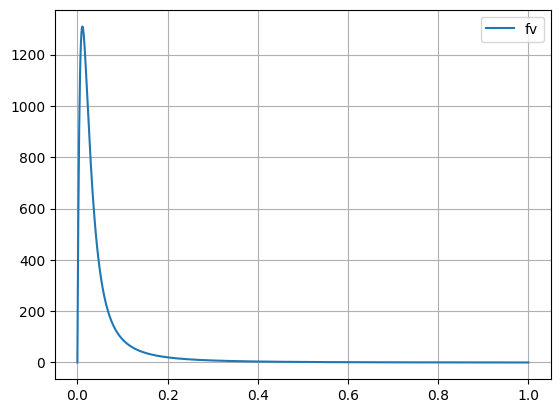

In [245]:
import matplotlib.pyplot as plt

_n = 100
ps = np.linspace(0.0,1,1000)
fig, ax = plt.subplots()
ax.plot(ps, fvarvec(ps, _n), label='fv')
#ax.plot(ps, -np.power(fun2v(ps, N_), 2), label='EV^2')
ax.legend()
ax.grid()